In [13]:
from table_extractor import TableExtractor
from card_extractor import CardExtractor
from card_classifier import CardClassifier
from chip_recognition import count_chips, crop_chips

import numpy as np
from collections import defaultdict


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def process_image(image) -> dict:
    """
    Process image and return information. To return the value of the cards we use 
    the following format: {number}{color}. Where 
        - color is either (D)imanond, (H)eart, (S)pade, (C)lub
        - number is either 2-10, (J)ack, (Q)ueen, (K)ing. A(s).
            
    Parameters
    ----------
    image:
        Input image to process

    Returns
    -------
    results:
        - T1 (str): String code of the first card of the flop (far left) 
        - T2 (str): String code of the second card of the flop
        - T3 (str): String code of the third card of the flop
        - T4 (str): String code of the turn
        - T5 (str): String code of the river
        - P11 (str or int): String code of player 1 card 1. Should be 0 if player 1 is not Playing.
        - P12 (str or int): String code of player 1 card 2. Should be 0 if player 1 is not Playing.
        - P21 (str or int): String code of player 2 card 1. Should be 0 if player 2 is not Playing.
        - P22 (str or int): String code of player 2 card 2. Should be 0 if player 2 is not Playing.
        - P31 (str or int): String code of player 3 card 1. Should be 0 if player 3 is not Playing.
        - P32 (str or int): String code of player 3 card 2. Should be 0 if player 3 is not Playing.
        - P41 (str or int): String code of player 4 card 1. Should be 0 if player 4 is not Playing.
        - P42 (str or int): String code of player 4 card 2. Should be 0 if player 4 is not Playing.
        - CR (int): Number of (r)ed chips in the pot
        - CG (int): Number of (g)reen chips in the pot
        - CB (int): Number of (b)lue chips in the pot
        - CK (int): Number of blac(k) chips in the pot
        - CW (int): Number of (w)hite chips in the pot
        
    Examples
    --------
    - QH: Queen of hearths
    - 10S: 10 of spades
    - AC: Ace f clubs

    """
    def def_value():
        return "0"
      
    results = defaultdict(def_value)
    #{
    #    # Player cards
    #    "P11": '2H' , "P12": '3C', "P21": 'KS', "P22": "QS", "P31": "KD", "P32":"5S" , "P41": "7H", "P42": "8H",
    #    # Chips
    #    "CR": 1, "CG": 1, "CB": 1,"CK": 5, "CW": 0
    #}
    
    plot = True
        
    # Extract table
    table_img = TableExtractor.extract_table(np.array(image), plot=plot)
    
    # Extract cards
    card_extractor = CardExtractor(table_img)
    
    
    # Classify bottom cards
    bottom_card_keys = ["T1", "T2", "T3", "T4", "T5"]
    bottom_cards = card_extractor.extract_bottom_cards(plot=plot)
    CardClassifier.classify_cards(bottom_cards, bottom_card_keys, results, plot)
    
    players = ["P1", "P2", "P3", "P4"]
    for player in players:
        if (plot):
            print(player)
        p1, p2 = card_extractor.extract_player_cards(player, plot=plot)
        
        first_card_name = player + "1"
        second_card_name = player + "2"

        is_face_down = False
        if (type(p1) != type(None)):
            is_face_down |= CardClassifier.is_card_face_down(p1, plot)
            if(not is_face_down):
                results[first_card_name] = CardClassifier.classify_card(p1, first_card_name, plot)
                
        if (type(p2) != type(None)):
            is_face_down |= CardClassifier.is_card_face_down(p2, plot)
            if(not is_face_down):
                results[second_card_name] = CardClassifier.classify_card(p2, first_card_name, plot)
        if(is_face_down):
            results[first_card_name] = "0"
            results[second_card_name] = "0"
            
    # Chips
    chips_img = crop_chips(table_img)
    count_chips(chips_img, results, plot)
    
    return results

# Evaluation

In [20]:
import os
import PIL.Image
import time

from utils import eval_listof_games , debug_listof_games, save_results , load_results
import pandas as pd

path_data = "data/train"
group_id = 0

Size of trainset:
	28
Game 0


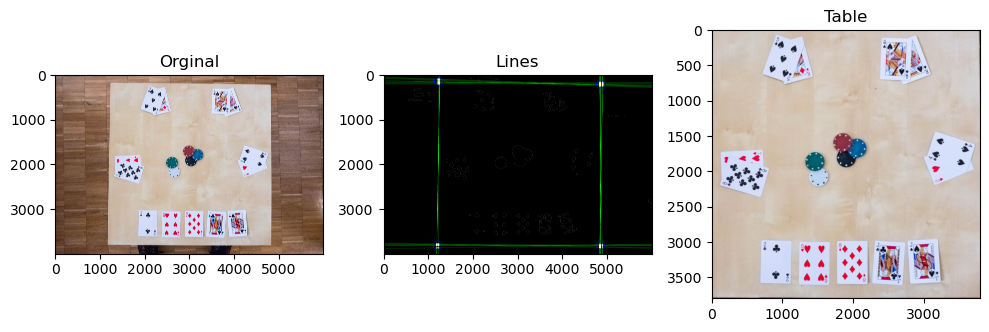

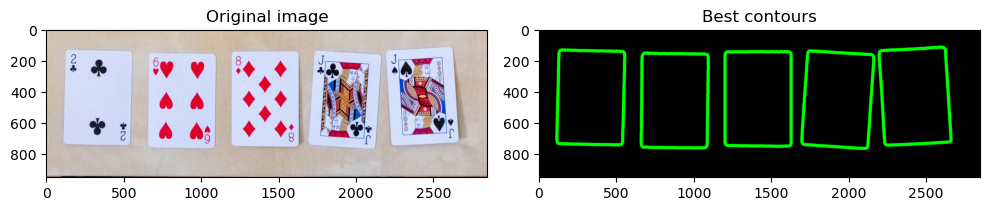

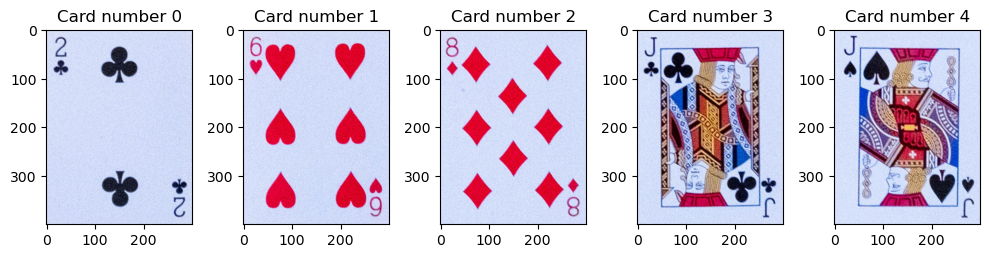

Predicted: 2C
Predicted: 6H
Predicted: 8D
Predicted: JC
Predicted: JS
P1
Extracted player card with height pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


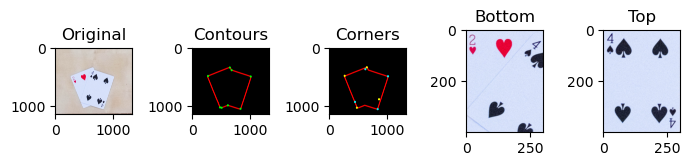

Predicted: 2H
Predicted: 4S
P2
Extracted player card with height pipeline: is top card:False
Extracted player card with width pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


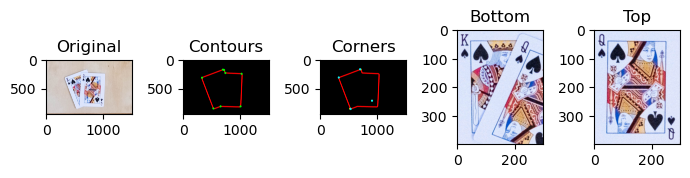

Predicted: KS
Predicted: QS
P3
Extracted player card with width pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


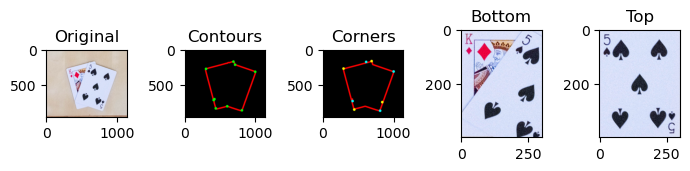

Predicted: KD
Predicted: 5S
P4
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Extracted player card with height pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


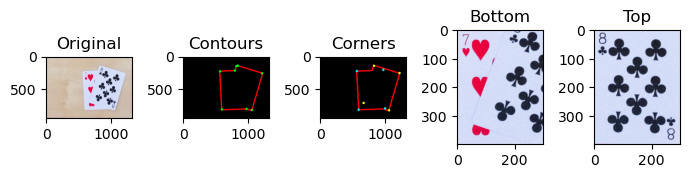

Predicted: 7H
Predicted: 8C


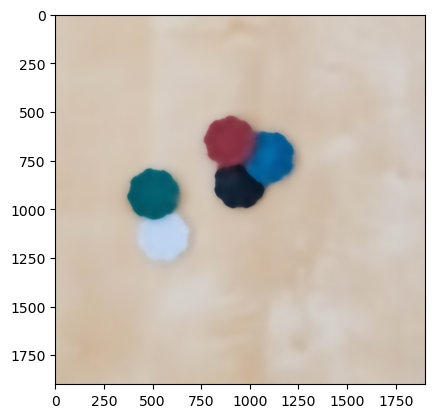

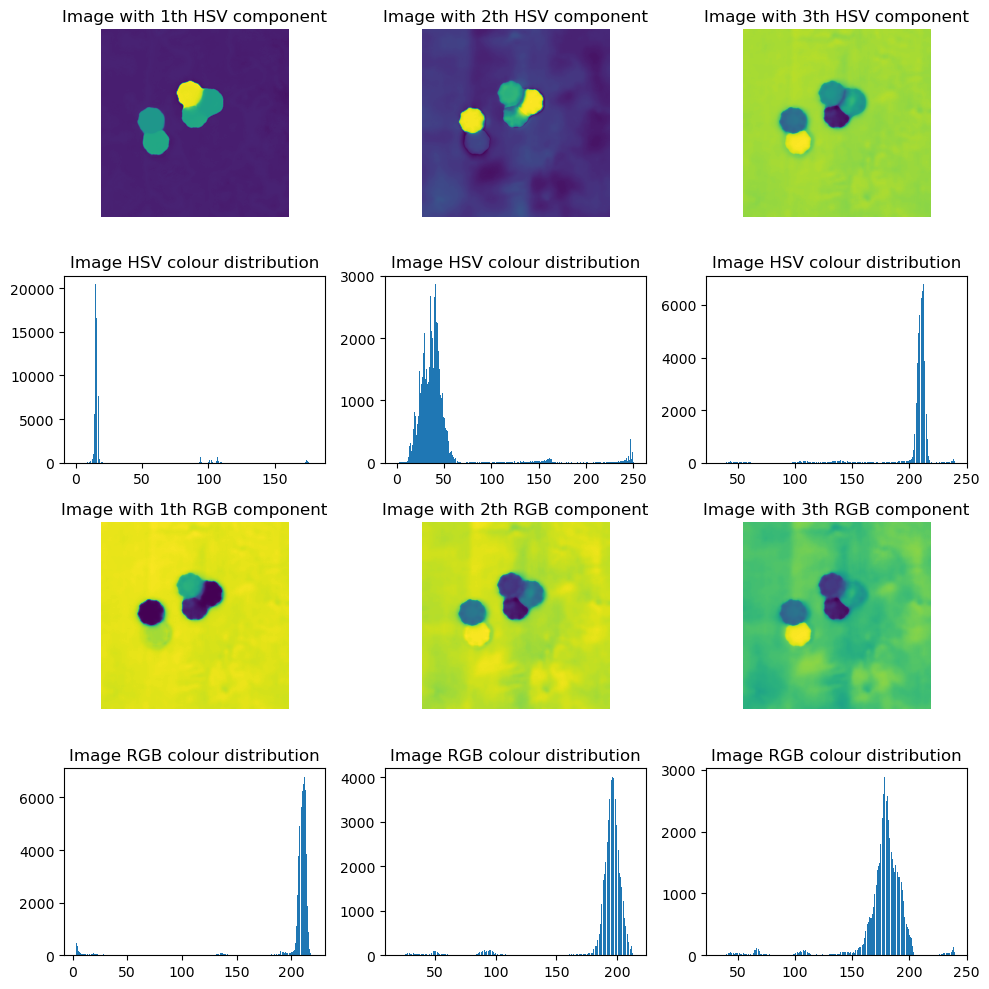

Detected 1 tokens of color red
Detected 1 tokens of color green
Detected 3 tokens of color blue


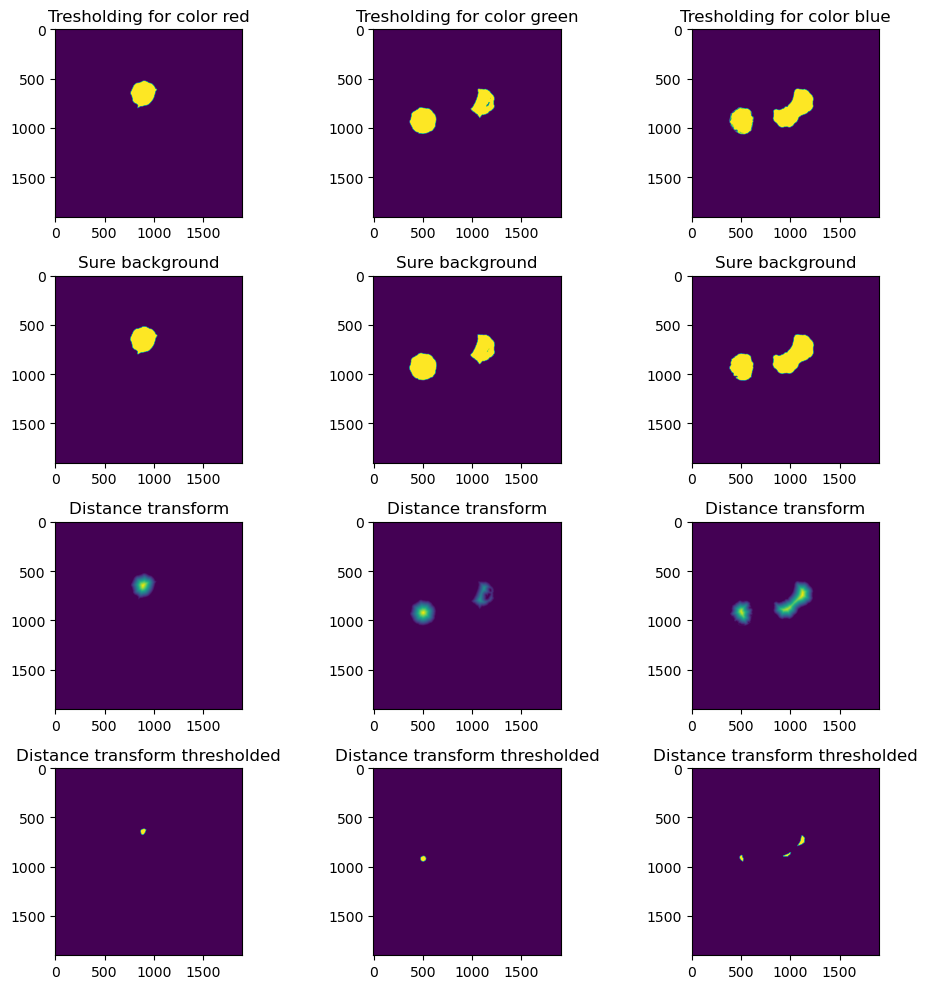

Predicted game 0 in 27.26838207244873s
Game 1


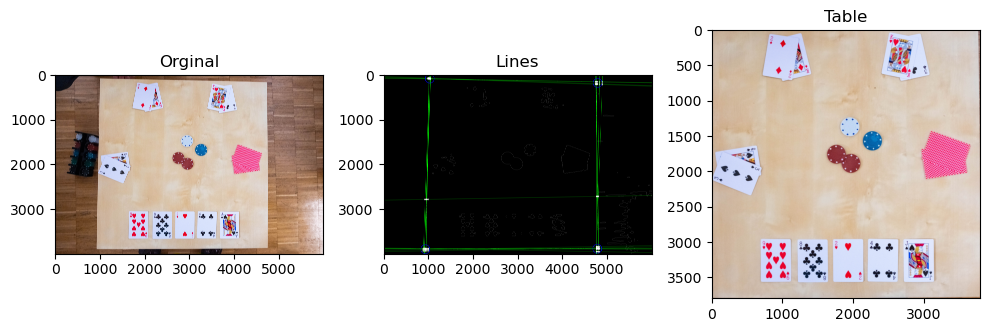

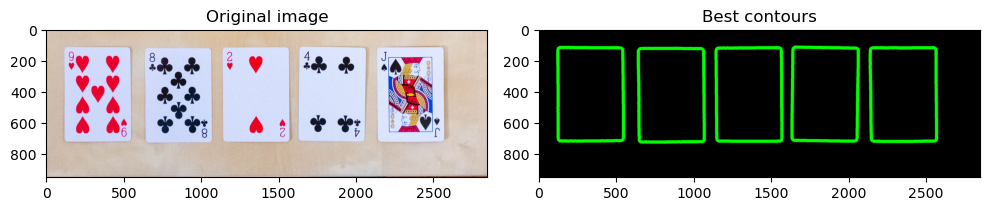

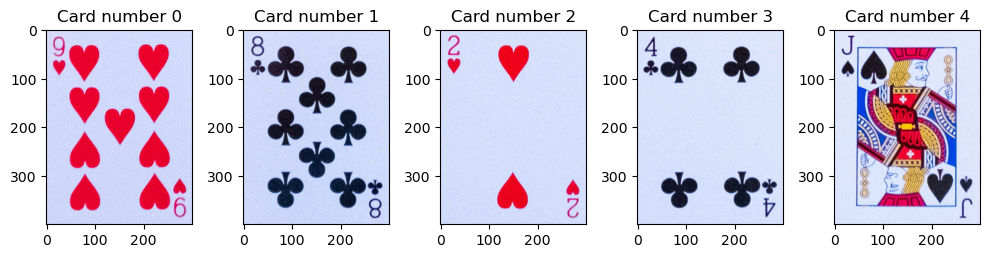

Predicted: 9H
Predicted: 8C
Predicted: 2H
Predicted: 4C
Predicted: JS
P1
Extracted player card with height pipeline: is top card:False
Extracted player card with width pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


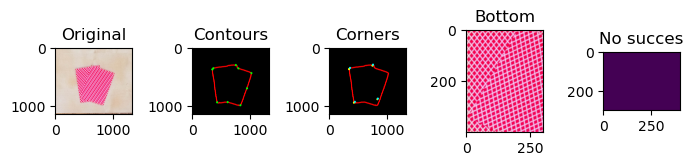

FACE DOWN
P2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Extracted player card with height pipeline: is top card:True
Extracted player card with width pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


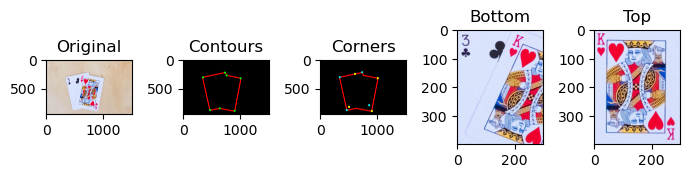

Predicted: 3C
Predicted: KH
P3
Extracted player card with height pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


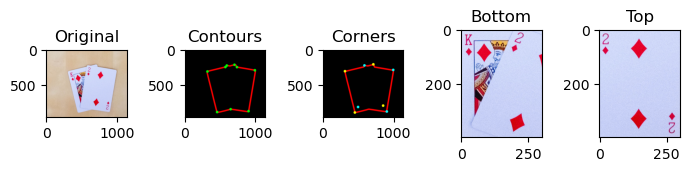

Predicted: KD
Predicted: 2D
P4
Extracted player card with height pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


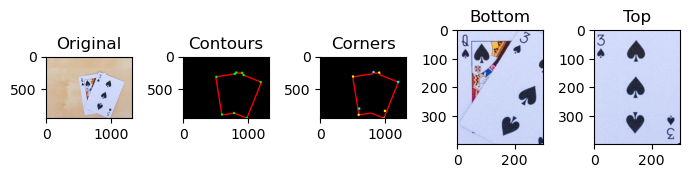

Predicted: QS
Predicted: 3S


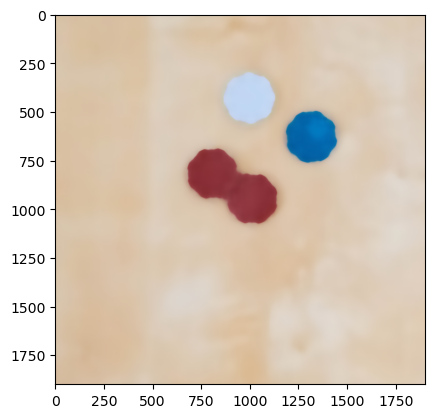

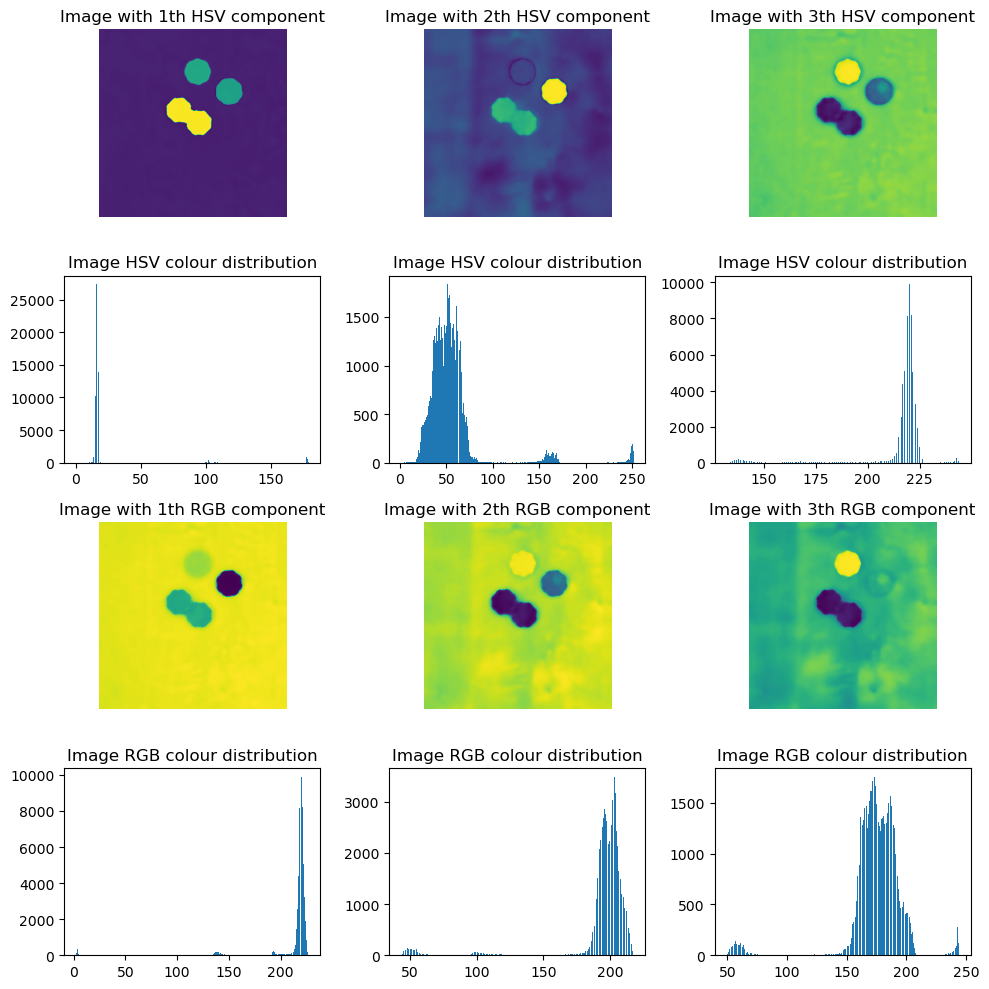

Detected 2 tokens of color red
Detected 1 tokens of color green
Detected 1 tokens of color blue


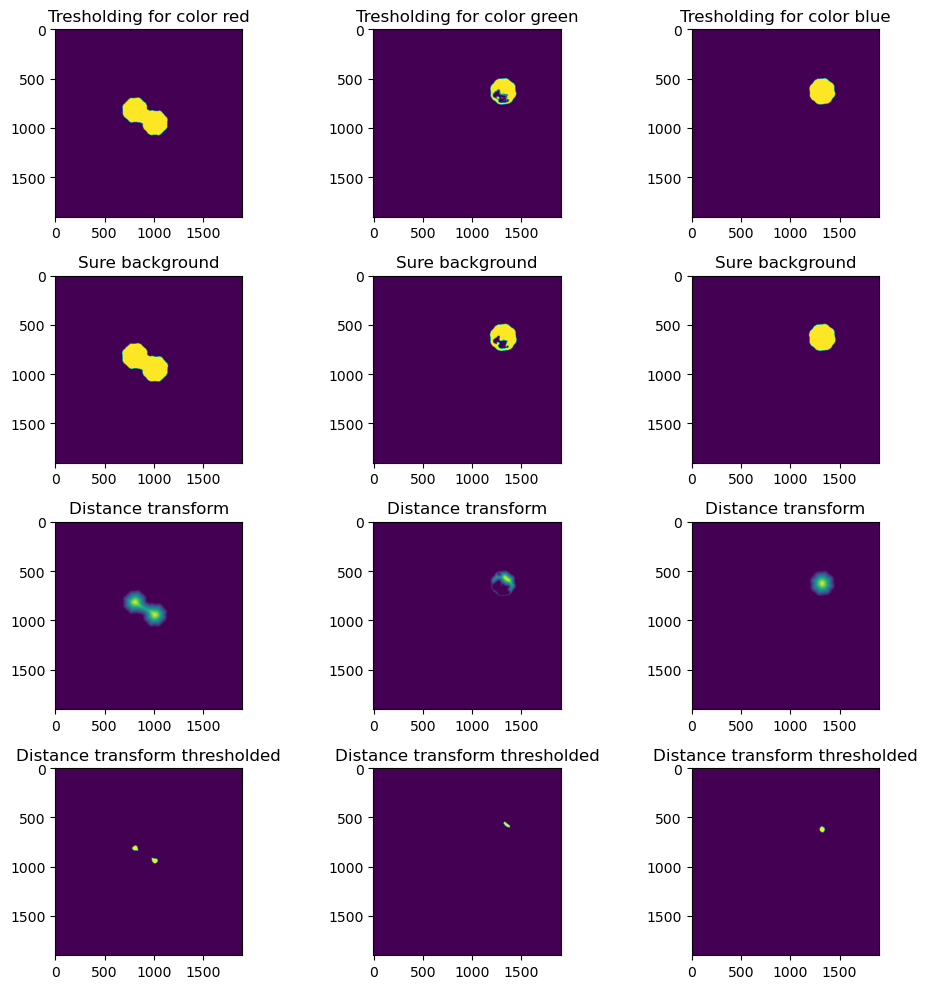

Predicted game 1 in 26.674432039260864s
Game 2


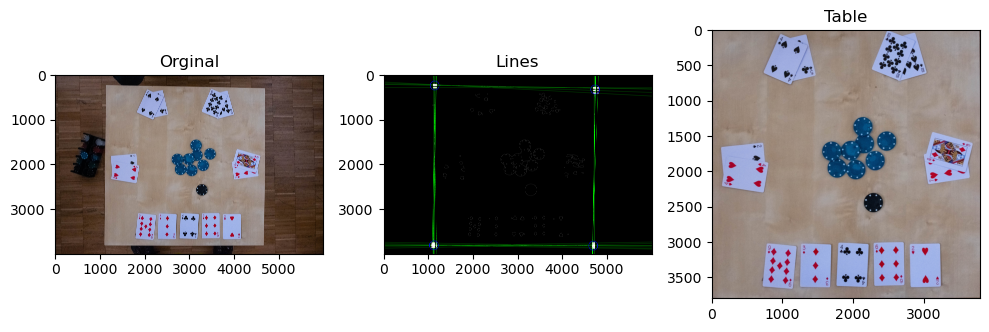

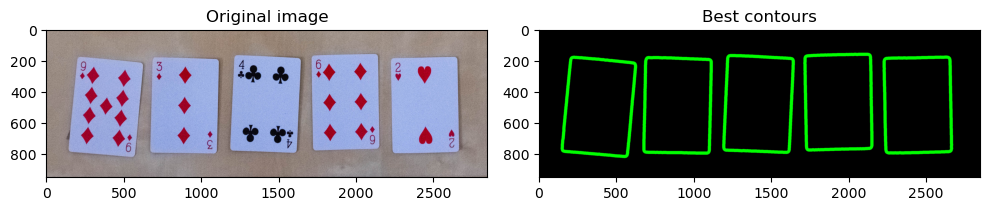

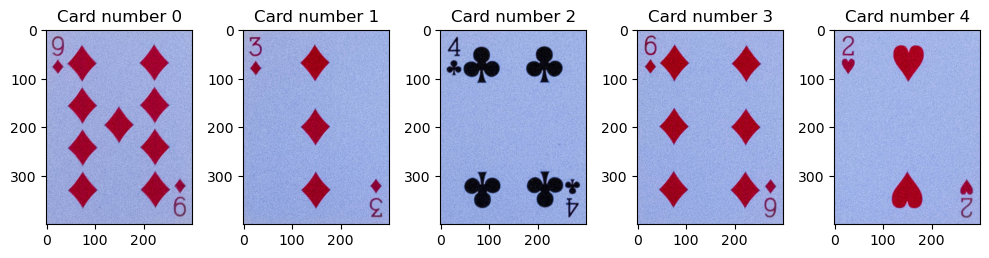

Predicted: 9D
Predicted: 3D
Predicted: 4C
Predicted: 6D
Predicted: 2H
P1
Extracted player card with height pipeline: is top card:True
Extracted player card with height pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


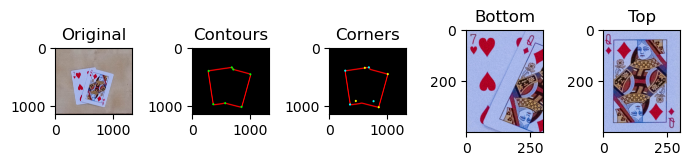

Predicted: 7H
Predicted: QD
P2
Extracted player card with height pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


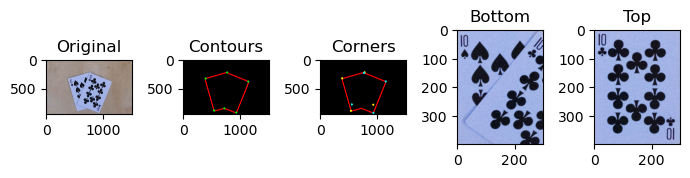

Predicted: 10S
Predicted: 10C
P3
Extracted player card with height pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


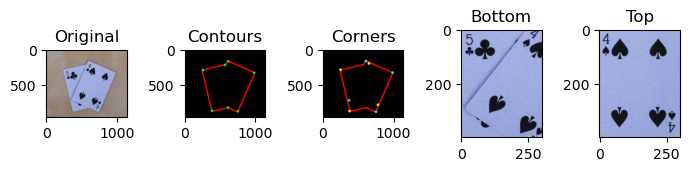

Predicted: 5C
Predicted: 4S
P4
Extracted player card with height pipeline: is top card:True
Extracted player card with height pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


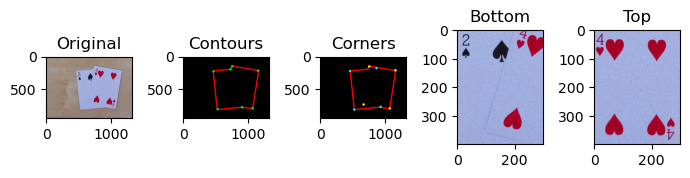

Predicted: 2S
Predicted: 4H


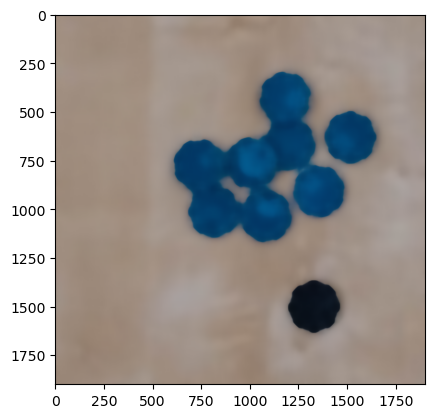

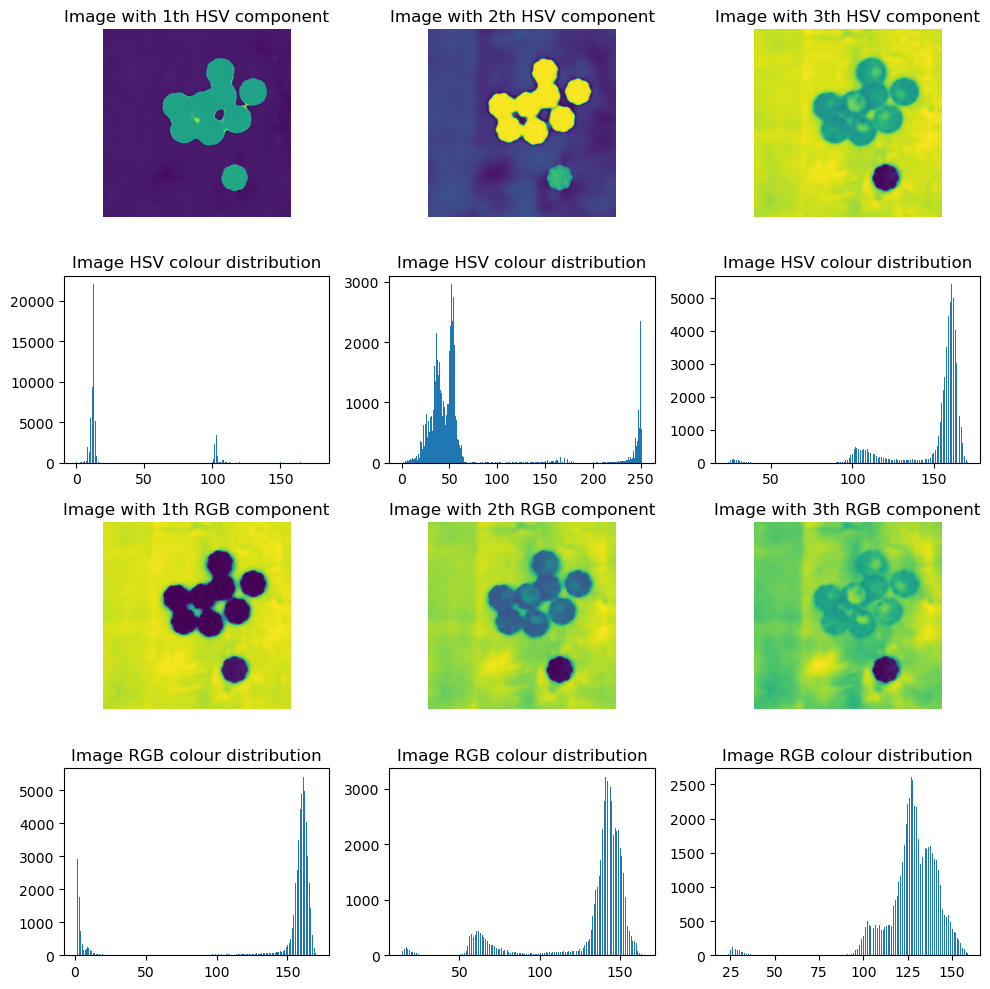

Detected 0 tokens of color red
Detected 2 tokens of color green
Detected 9 tokens of color blue


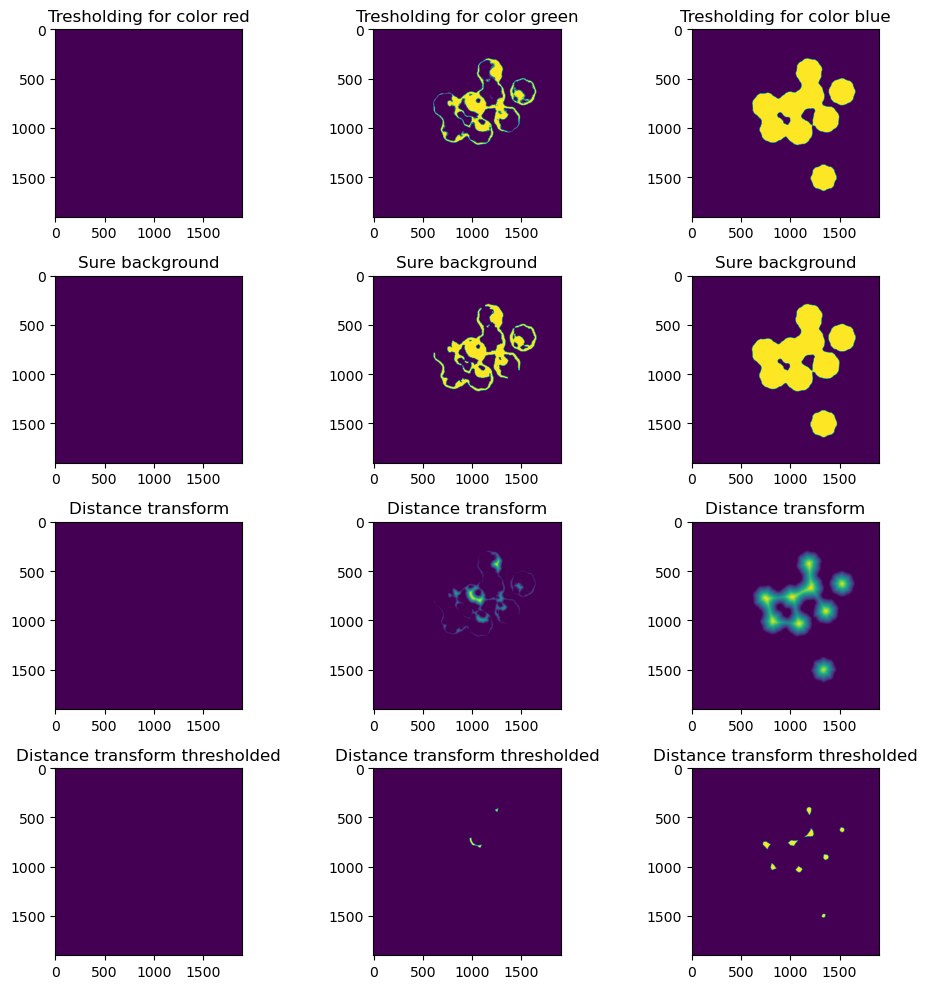

Predicted game 2 in 25.334523916244507s
Game 3


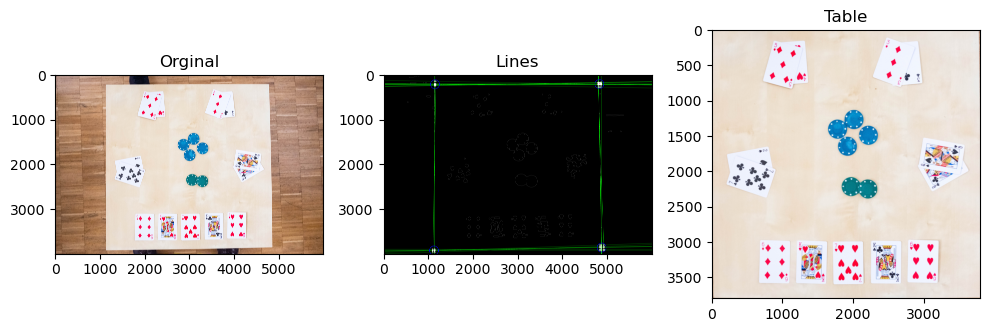

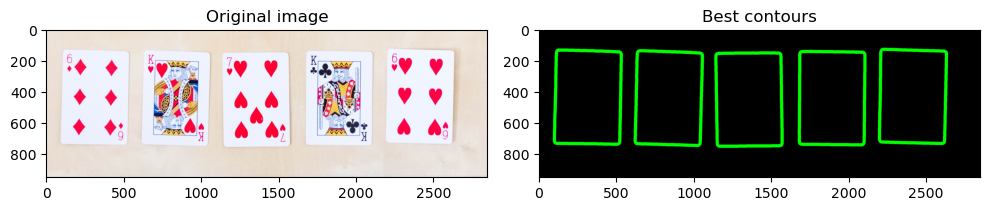

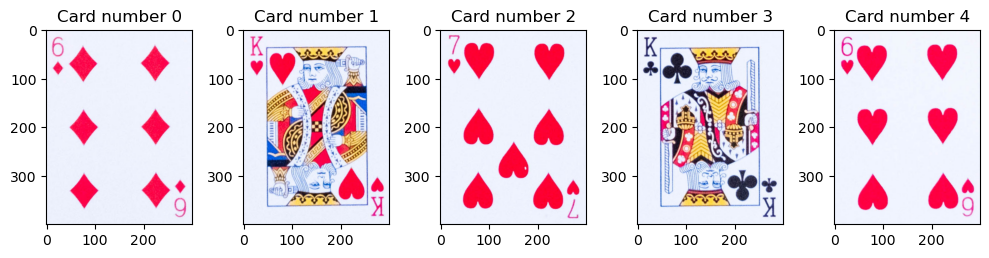

Predicted: 6D
Predicted: KH
Predicted: 7H
Predicted: KC
Predicted: 6H
P1
Extracted player card with height pipeline: is top card:True
Extracted player card with width pipeline: is top card:True
Extracted player card with width pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


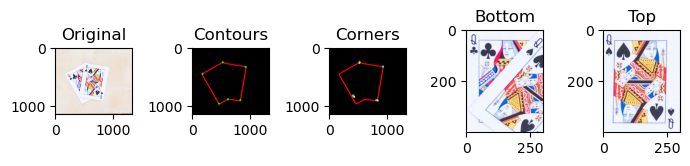

Predicted: QC
Predicted: QS
P2
Extracted player card with height pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


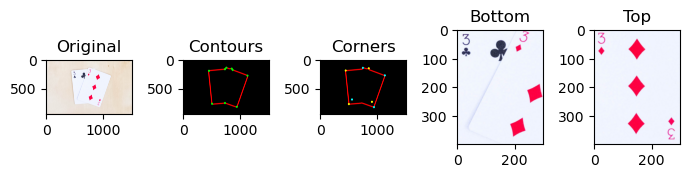

Predicted: 3C
Predicted: 3D
P3
Extracted player card with width pipeline: is top card:True
Extracted player card with height pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


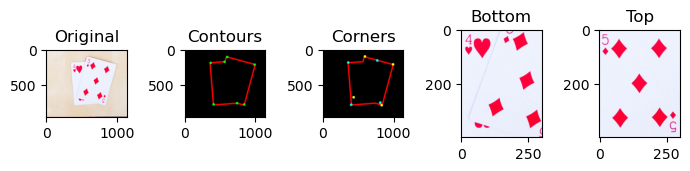

Predicted: 4H
Predicted: 5D
P4
Extracted player card with height pipeline: is top card:False
Extracted player card with width pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


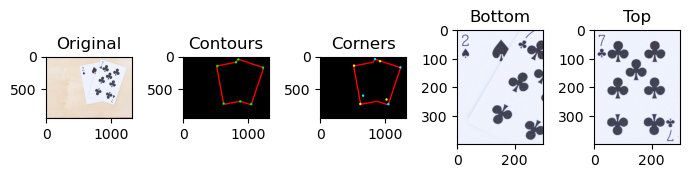

Predicted: 2S
Predicted: 7C


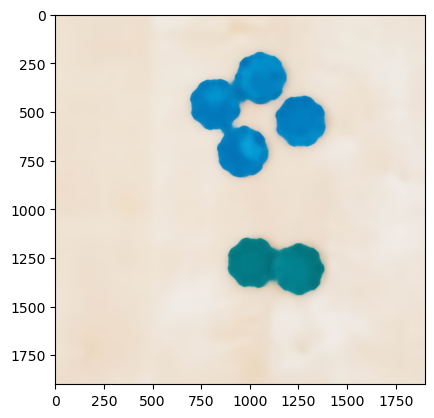

In [ ]:
## load train size dataset
train_size = np.loadtxt(os.path.join(path_data, "train_size.txt")).astype(int)
print("Size of trainset:\n\t{}".format(train_size))

# Load images from folder
game_results = {}

# Evaluate three images
games_id = range(28)  # to evaluate  three images


for i in games_id :
    print(f"Game {i}")


    start_time = time.time()
    file = os.path.join(path_data, f"train_{str(i).zfill(2)}.jpg")
    # open the image
    im = PIL.Image.open(file)
    # Process the image
    results = process_image(image=im)
    # Append result to array
    game_results[i] = results
    
    print(f"Predicted game {i} in {time.time() - start_time}s")
    #print("Prediciton game:\n\t{}: {}".format(0, game_results[i])) #overlay

# Saving results
file_results = save_results(results=game_results, groupid=group_id)

In [17]:
# Checking the results were loaded correctly
loaded_results = load_results(file_results)
print(loaded_results.keys())

game_labels = pd.read_csv('data/train/train_labels.csv')
game_labels = game_labels.fillna('0')

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'])


In [18]:
eval_listof_games( game_results , game_labels , game_id = games_id)

Game 0 results
Estimated game
['2C', '6H', '8D', 'JC', 'JS', '2H', '4S', 'KS', 'QS', 'KD', '5S', '7H', '8C', 1, 1, 3, '0', '0']
True game
['2C' '6H' '8D' 'JC' 'JS' '2H' '4S' 'KS' 'QS' 'KD' '5S' '7H' '8C' 1 1 1 1
 1]


             	scores
Card number 	1.0 %
Card suit   	1.0 %
Chips       	0.33 %


FINAL score 	0.78 %
________________________________________
Game 1 results
Estimated game
['9H', '8C', '2H', '4C', 'JS', '0', '0', '3C', 'KH', 'KD', '2D', 'QS', '3S', 2, 1, 1, '0', '0']
True game
['9H' '8C' '2H' '4C' 'JS' '0' '0' '3C' 'KH' 'KD' '2D' 'QS' '3S' 2 0 1 0 1]


             	scores
Card number 	1.0 %
Card suit   	1.0 %
Chips       	0.6 %


FINAL score 	0.87 %
________________________________________
Game 2 results
Estimated game
['9D', '3D', '4C', '6D', '2H', '7H', 'QD', '10S', '10C', '5C', '4S', '2S', '4H', 0, 2, 9, '0', '0']
True game
['9D' '3D' '4C' '6D' '2H' '7H' 'QD' '10S' '10C' '5C' '4S' '2S' '4H' 0 0 8
 1 0]


             	scores
Card number 	1.0 %
Card suit   	1.0 %
Chips

0.7312311696240269

0.682558645058645

0.7312311696240269